In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
import os
os.chdir('/content/drive/My Drive/IP Project/dataset')
!ls

circ-calc  Info.txt  Licence.txt  normal


### Importing important libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [8]:
abnormal_filenames=sorted(glob.glob('circ-calc/*.pgm'))
normal_filenames=sorted(glob.glob('normal/*.pgm'))
print(abnormal_filenames)
print(normal_filenames)

['circ-calc/mdb001.pgm', 'circ-calc/mdb002.pgm', 'circ-calc/mdb005.pgm', 'circ-calc/mdb010.pgm', 'circ-calc/mdb012.pgm', 'circ-calc/mdb021.pgm', 'circ-calc/mdb025.pgm', 'circ-calc/mdb132.pgm', 'circ-calc/mdb209.pgm', 'circ-calc/mdb211.pgm', 'circ-calc/mdb212.pgm', 'circ-calc/mdb213.pgm', 'circ-calc/mdb214.pgm', 'circ-calc/mdb222.pgm', 'circ-calc/mdb223.pgm', 'circ-calc/mdb226.pgm', 'circ-calc/mdb227.pgm']
['normal/mdb003.pgm', 'normal/mdb004.pgm', 'normal/mdb006.pgm', 'normal/mdb007.pgm', 'normal/mdb008.pgm', 'normal/mdb009.pgm', 'normal/mdb033.pgm', 'normal/mdb034.pgm', 'normal/mdb035.pgm', 'normal/mdb036.pgm', 'normal/mdb037.pgm', 'normal/mdb038.pgm', 'normal/mdb039.pgm', 'normal/mdb040.pgm', 'normal/mdb146.pgm', 'normal/mdb147.pgm', 'normal/mdb189.pgm', 'normal/mdb250.pgm', 'normal/mdb251.pgm', 'normal/mdb282.pgm', 'normal/mdb283.pgm', 'normal/mdb284.pgm']


### Vizualizing some examples from both classes

shape of each image (1024, 1024)


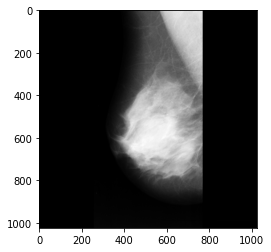

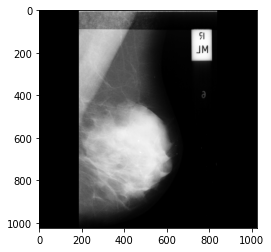

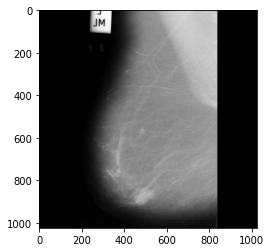

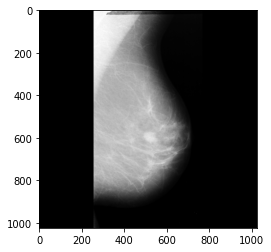

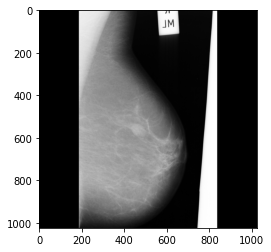

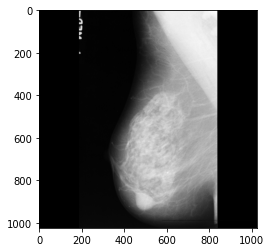

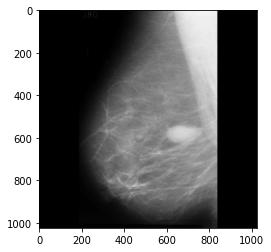

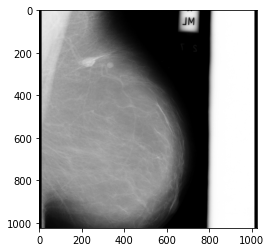

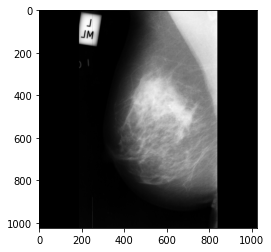

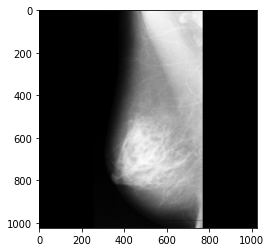

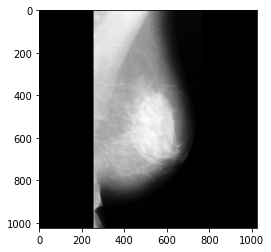

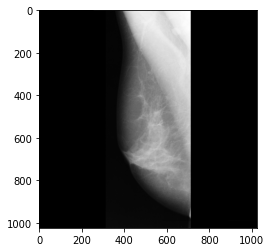

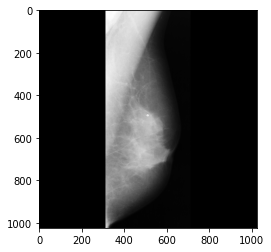

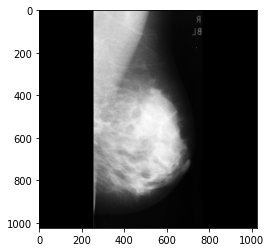

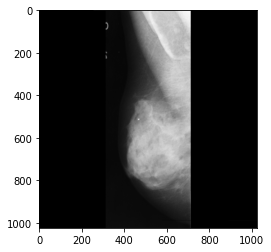

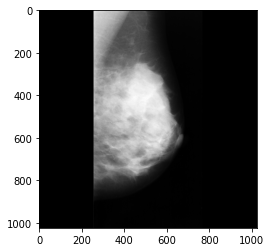

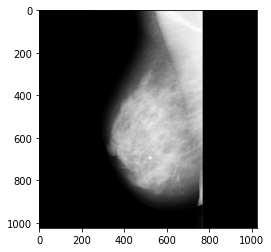

In [9]:
for filename in abnormal_filenames:
    im = cv2.imread(filename, -1)
    plt.figure()
    plt.imshow(im, cmap='gray')
print('shape of each image',im.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


shape of each image (1024, 1024)


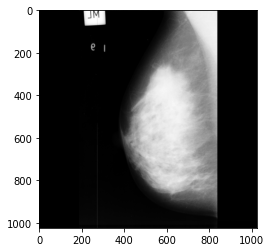

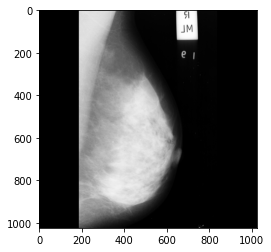

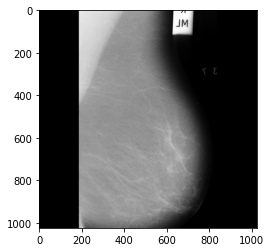

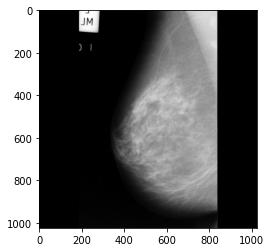

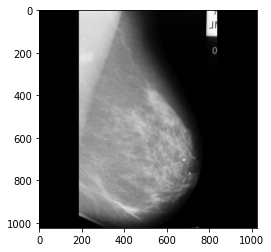

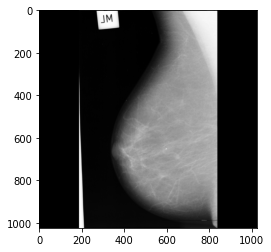

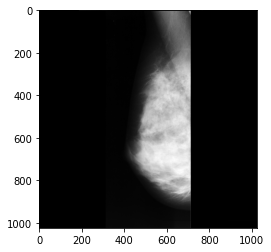

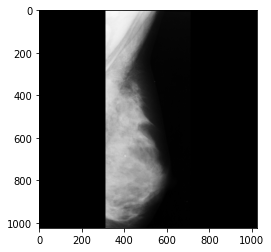

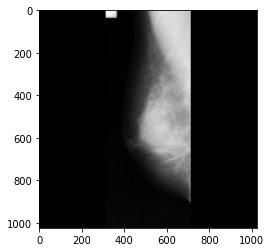

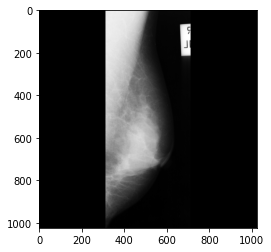

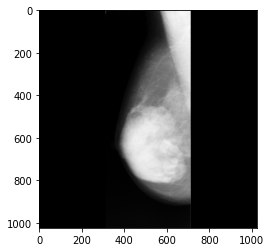

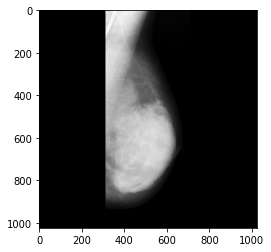

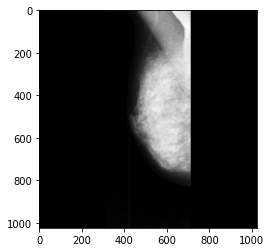

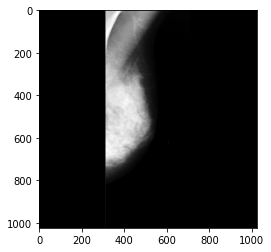

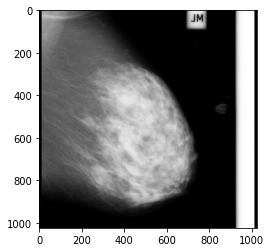

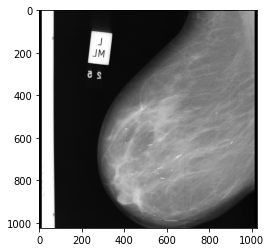

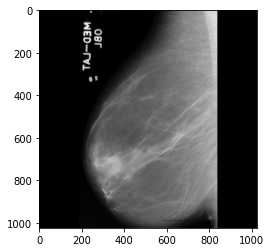

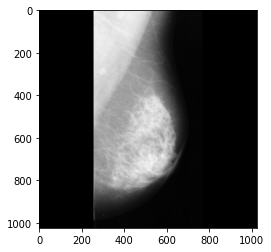

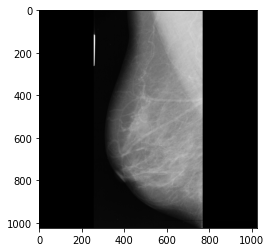

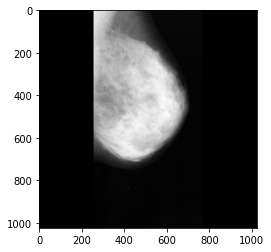

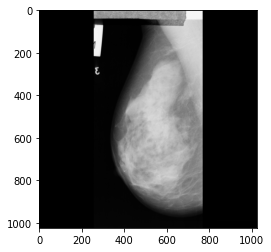

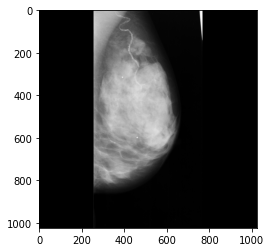

In [10]:
for filename in normal_filenames:
    im = cv2.imread(filename, -1)
    plt.figure()
    plt.imshow(im, cmap='gray')
print('shape of each image',im.shape)

### Applying film artifact removal filter (1st Step)


We will find the mean of each pixel with a 3x3 and a 5x5 size kernel

First 3x3 kernel

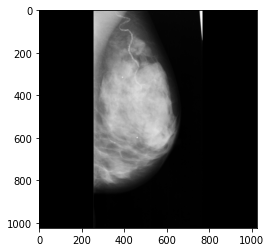

In [35]:
def mean3x3(img):
    kernel = np.ones((3,3),np.float32)/9
    mean3 = cv2.filter2D(img,-1,kernel)
    plt.imshow(mean3, cmap='gray')
    return mean3

image = cv2.imread(normal_filenames[-1],-1)
mean3 = mean3x3(image)

Finding the difference between original image and averaged image

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

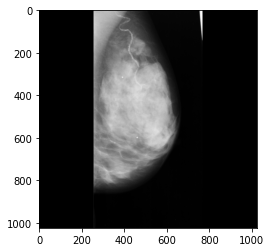

In [48]:
S = np.ones((1024,1024))
T = 7

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if diff3[i][j]>T:
            S[i][j]=mean3[i][j]
        else:
            S[i][j]=image[i][j]
plt.imshow(S,cmap='gray')
print(set(S.flatten()))

Now with the 5x5 size kernel

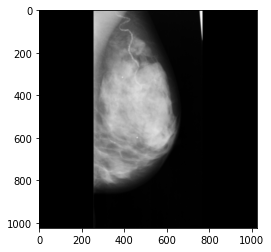

In [68]:
def mean5x5(img):
    kernel = np.ones((5,5),np.float32)/25
    mean5 = cv2.filter2D(img,-1,kernel)
    plt.imshow(mean5, cmap='gray')
    return mean3

image = cv2.imread(normal_filenames[-1],-1)
mean5 = mean5x5(image)

In [69]:
diff5 = image-mean5
print(set(diff5.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 195, 199, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}


{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

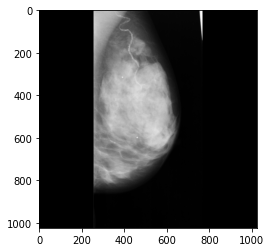

In [70]:
S = np.ones((1024,1024))
T = 3

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if diff3[i][j]>T:
            S[i][j]=mean3[i][j]
        else:
            S[i][j]=image[i][j]
plt.imshow(S,cmap='gray')
print(set(S.flatten()))

### Computing Gradient images (2nd step)

First the sobel and compass operators

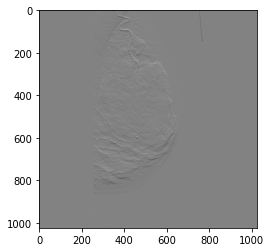

In [82]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobel = sobelx+sobely
plt.imshow(sobely, cmap='gray')

In [83]:
np.max(sobelx)

798.0

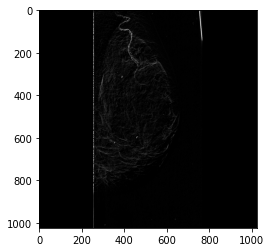

In [88]:
S1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
S2 =np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

G1 = cv2.filter2D(image,-1,S1)
G2 = cv2.filter2D(image,-1,S2)

G=G1+G2
plt.imshow(G,cmap='gray')

In [89]:
np.max(G)

255